In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/17-googleplaystore.csv')

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df.shape

(10841, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [ ]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
#df['Reviews'] = df['Reviews'].astype(float)

In [ ]:
df['Reviews'].str.isnumeric().sum()

np.int64(10840)

In [ ]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df_clean = df.copy()

In [ ]:
df_clean = df_clean.drop(df_clean.index[10472])

In [ ]:
df_clean['Reviews'].str.isnumeric().sum()

np.int64(10840)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [ ]:
df_clean['Reviews'] = df_clean['Reviews'].astype(int)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [ ]:
df_clean.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [ ]:
df_clean['Size'].value_counts()

,count
Size,
Varies with device,1695
11M,198
12M,196
14M,194
13M,191
...,...
253k,1
992k,1
658k,1


In [ ]:
df_clean['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
df_clean['Size'] = df_clean['Size'].str.replace('M','000')
df_clean['Size'] = df_clean['Size'].str.replace('k','')
df_clean['Size'] = df_clean['Size'].str.replace('Varies with device',str(np.nan))
df_clean['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', 'nan', '9.4000', '15000', '10000', '1.2000', '26000',
       '8.0000', '7.9000', '56000', '57000', '35000', '54000', '201',
       '3.6000', '5.7000', '8.6000', '2.4000', '27000', '2.5000', '16000',
       '3.4000', '8.9000', '3.9000', '2.9000', '38000', '32000', '5.4000',
       '18000', '1.1000', '2.2000', '4.5000', '9.8000', '52000', '9.0000',
       '6.7000', '30000', '2.6000', '7.1000', '3.7000', '22000', '7.4000',
       '6.4000', '3.2000', '8.2000', '9.9000', '4.9000', '9.5000',
       '5.0000', '5.9000', '13000', '73000', '6.8000', '3.5000', '4.0000',
       '2.3000', '7.2000', '2.1000', '42000', '7.3000', '9.1000', '55000',
       '23', '6.5000', '1.5000', '7.5000', '51000'

In [ ]:
df_clean['Size'] = df_clean['Size'].astype(float)

In [ ]:
df_clean['Size']

,Size
0,19000.0
1,14000.0
2,8.7
3,25000.0
4,2.8
...,...
10836,53000.0
10837,3.6
10838,9.5
10839,NaN


In [ ]:
df_clean.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,1695
Installs,0
Type,1
Price,0
Content Rating,0
Genres,0


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [ ]:
df_clean.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.0,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
 df_clean['Installs'].value_counts()

,count
Installs,
"1,000,000+",1579
"10,000,000+",1252
"100,000+",1169
"10,000+",1054
"1,000+",907
"5,000,000+",752
100+,719
"500,000+",539
"50,000+",479


In [ ]:
df_clean['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
df_clean['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
chars_to_remove = ['+',',','$']
cols_to_clean = ['Installs','Price']

In [ ]:
for item in chars_to_remove:
  for col in cols_to_clean:
    df_clean[col] = df_clean[col].str.replace(item,'')

In [ ]:
df_clean['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [ ]:
df_clean['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [ ]:
df_clean['Installs'] = df_clean['Installs'].astype(int)
df_clean['Price'] = df_clean['Price'].astype(float)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [ ]:
df_clean.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,19579.419913,1.546434e+07,1.027368
std,0.515219,2.927761e+06,24042.062020,8.502936e+07,15.949703
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.600000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,30000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [ ]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df_clean['Last Updated'] = pd.to_datetime(df_clean['Last Updated'])

In [ ]:
df_clean['Last Updated'].unique()

<DatetimeArray>
['2018-01-07 00:00:00', '2018-01-15 00:00:00', '2018-08-01 00:00:00',
 '2018-06-08 00:00:00', '2018-06-20 00:00:00', '2017-03-26 00:00:00',
 '2018-04-26 00:00:00', '2018-06-14 00:00:00', '2017-09-20 00:00:00',
 '2018-07-03 00:00:00',
 ...
 '2015-11-23 00:00:00', '2012-06-17 00:00:00', '2015-02-27 00:00:00',
 '2013-12-18 00:00:00', '2012-02-06 00:00:00', '2014-11-25 00:00:00',
 '2016-05-19 00:00:00', '2014-01-20 00:00:00', '2014-02-16 00:00:00',
 '2014-03-23 00:00:00']
Length: 1377, dtype: datetime64[ns]

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.4+ MB


In [ ]:
df_clean['Day'] = df_clean['Last Updated'].dt.day
df_clean['Month'] = df_clean['Last Updated'].dt.month
df_clean['Year'] = df_clean['Last Updated'].dt.year

In [ ]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [ ]:
#EDA
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

In [ ]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [ ]:
df_clean.duplicated('App')

,0
0,False
1,False
2,False
3,False
4,False
...,...
10836,False
10837,False
10838,False
10839,False


In [ ]:
df_clean[df_clean.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,6,7,2018
10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,30,7,2018


In [ ]:
df_clean = df_clean.drop_duplicates(subset='App', keep='first')

In [ ]:
df_clean.shape

(9659, 16)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Day             9659 non-null   int32         
 14  Month           9659 non-null   int32         
 15  Year    

In [ ]:
numeric_features = [feature for feature in df_clean.columns if df_clean[feature].dtype != 'O']
categorical_features = [feature for feature in df_clean.columns if df_clean[feature].dtype == 'O']

In [ ]:
print(numeric_features)
print(categorical_features)

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']
['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [ ]:
df_clean['App'].dtype

dtype('O')

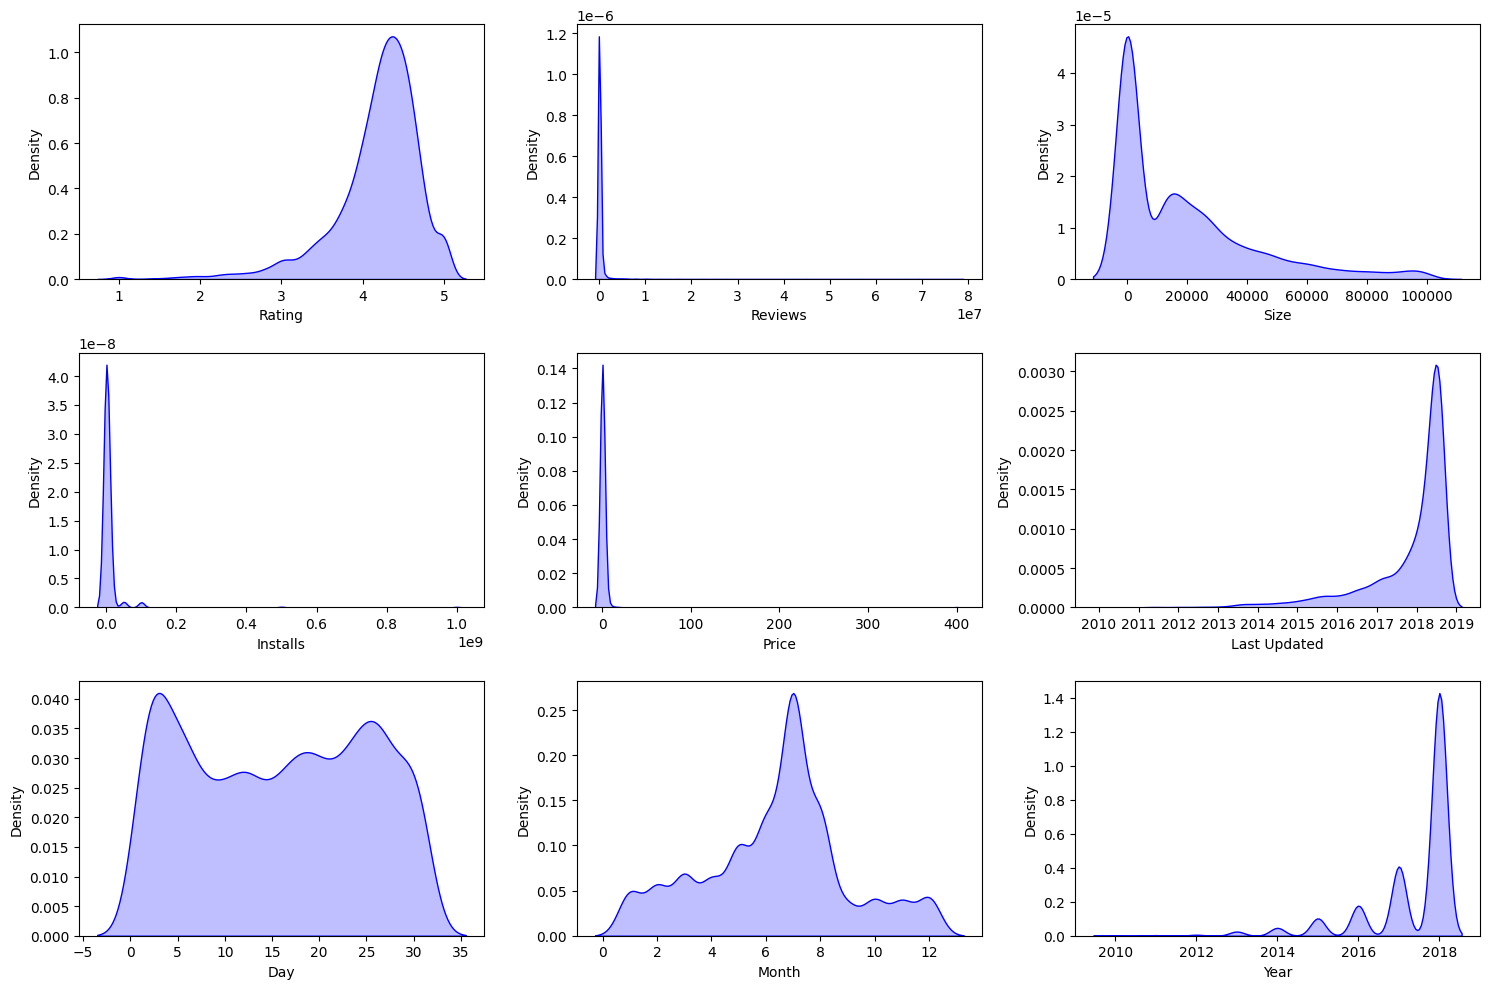

In [ ]:
plt.figure(figsize=(15,10))
for i in range(len(numeric_features)):
  plt.subplot(3,3,i+1)
  sns.kdeplot(x=df_clean[numeric_features[i]], color='b', fill=True)
  plt.tight_layout()
  plt.xlabel(numeric_features[i]),
plt.show()

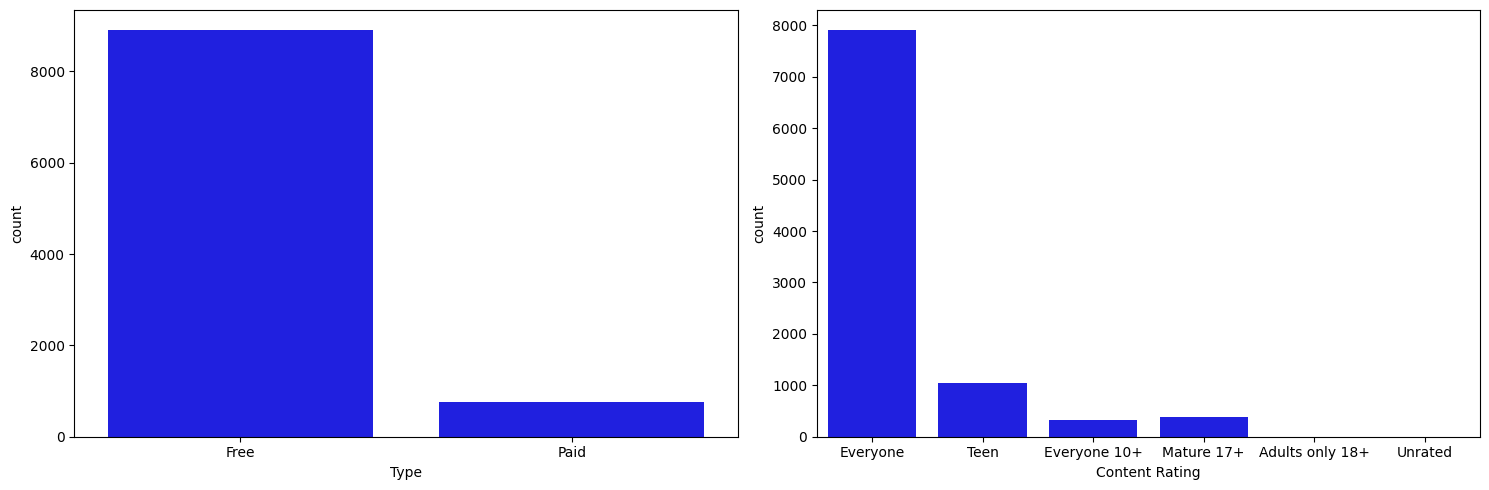

In [ ]:
plt.figure(figsize=(15,5))


category = ["Type", "Content Rating"]

for i in range(len(category)):
  plt.subplot(1,2,i+1)
  sns.countplot(x=df_clean[category[i]], color= "b", fill= True)
  plt.tight_layout()

plt.show()

In [ ]:
df_clean['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
df_clean['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [ ]:
df_clean["Category"].value_counts()

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


In [ ]:
#top app categories by installment

In [ ]:
df_cat_installs = df_clean.groupby('Category')['Installs'].sum().sort_values(ascending=False).reset_index()

In [ ]:
df_cat_installs

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


<Axes: xlabel='Category'>

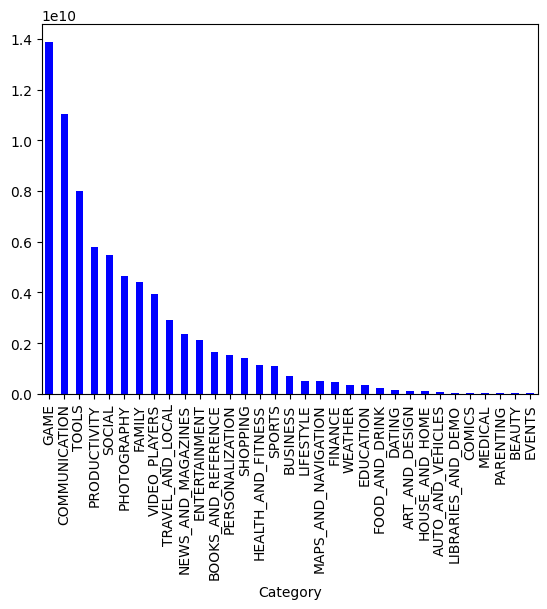

In [ ]:
df_clean.groupby('Category')['Installs'].sum().sort_values(ascending=False).plot(kind='bar', color='b')

In [ ]:
df_cat_installs['Installs'] = df_cat_installs['Installs']/1000000

In [ ]:
df_cat_installs

,Category,Installs
0,GAME,13878.924415
1,COMMUNICATION,11038.276251
2,TOOLS,8001.771915
3,PRODUCTIVITY,5793.091369
4,SOCIAL,5487.867902
5,PHOTOGRAPHY,4649.147655
6,FAMILY,4427.941505
7,VIDEO_PLAYERS,3926.902720
8,TRAVEL_AND_LOCAL,2894.887146
9,NEWS_AND_MAGAZINES,2369.217760


<Axes: xlabel='Category', ylabel='Installs'>

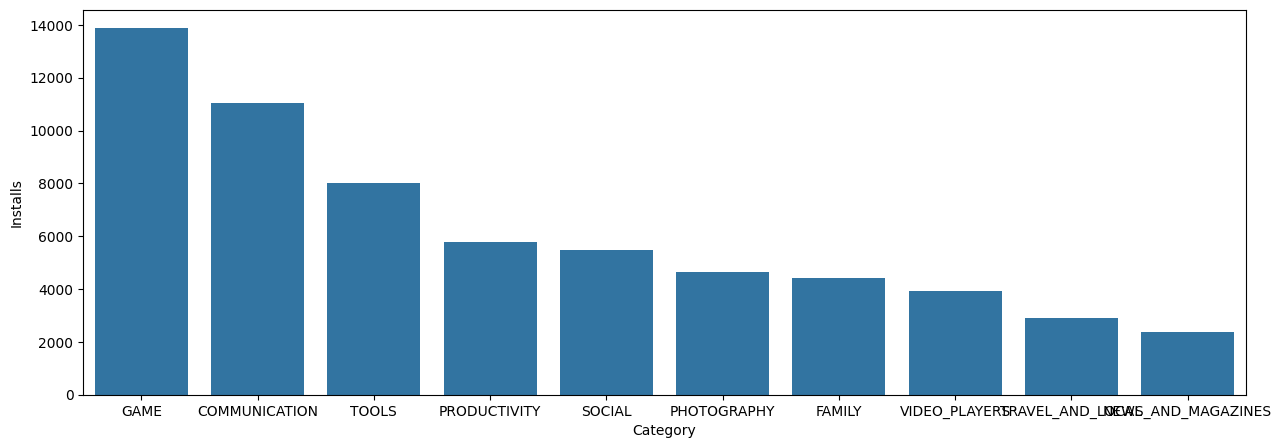

In [ ]:
df2 = df_cat_installs.head(10)
plt.figure(figsize=(15,5))
sns.barplot(x='Category', y='Installs', data=df2)

In [ ]:
#top 5 appsin categories

In [ ]:
apps =['GAME', 'COMMNICATION', 'TOOLS', 'PRODUCTIVITY', 'SOCIAL']

In [ ]:
df_clean.groupby(['Category','App'])['Installs'].sum().sort_values(ascending=False)

,,Installs
Category,App,
TRAVEL_AND_LOCAL,Maps - Navigate & Explore,1000000000
ENTERTAINMENT,Google Play Games,1000000000
VIDEO_PLAYERS,Google Play Movies & TV,1000000000
NEWS_AND_MAGAZINES,Google News,1000000000
COMMUNICATION,Skype - free IM & video calls,1000000000
...,...,...
BUSINESS,CX Network,0
FINANCE,Eu Sou Rico,0
FAMILY,Command & Conquer: Rivals,0


In [ ]:
df_app_category =df_clean.groupby(['Category','App'])['Installs'].sum().reset_index()

In [ ]:
df2

,Category,Installs
0,GAME,13878.924415
1,COMMUNICATION,11038.276251
2,TOOLS,8001.771915
3,PRODUCTIVITY,5793.091369
4,SOCIAL,5487.867902
5,PHOTOGRAPHY,4649.147655
6,FAMILY,4427.941505
7,VIDEO_PLAYERS,3926.902720
8,TRAVEL_AND_LOCAL,2894.887146
9,NEWS_AND_MAGAZINES,2369.217760


In [ ]:
df_app_category = df_app_category.sort_values('Installs', ascending=False)

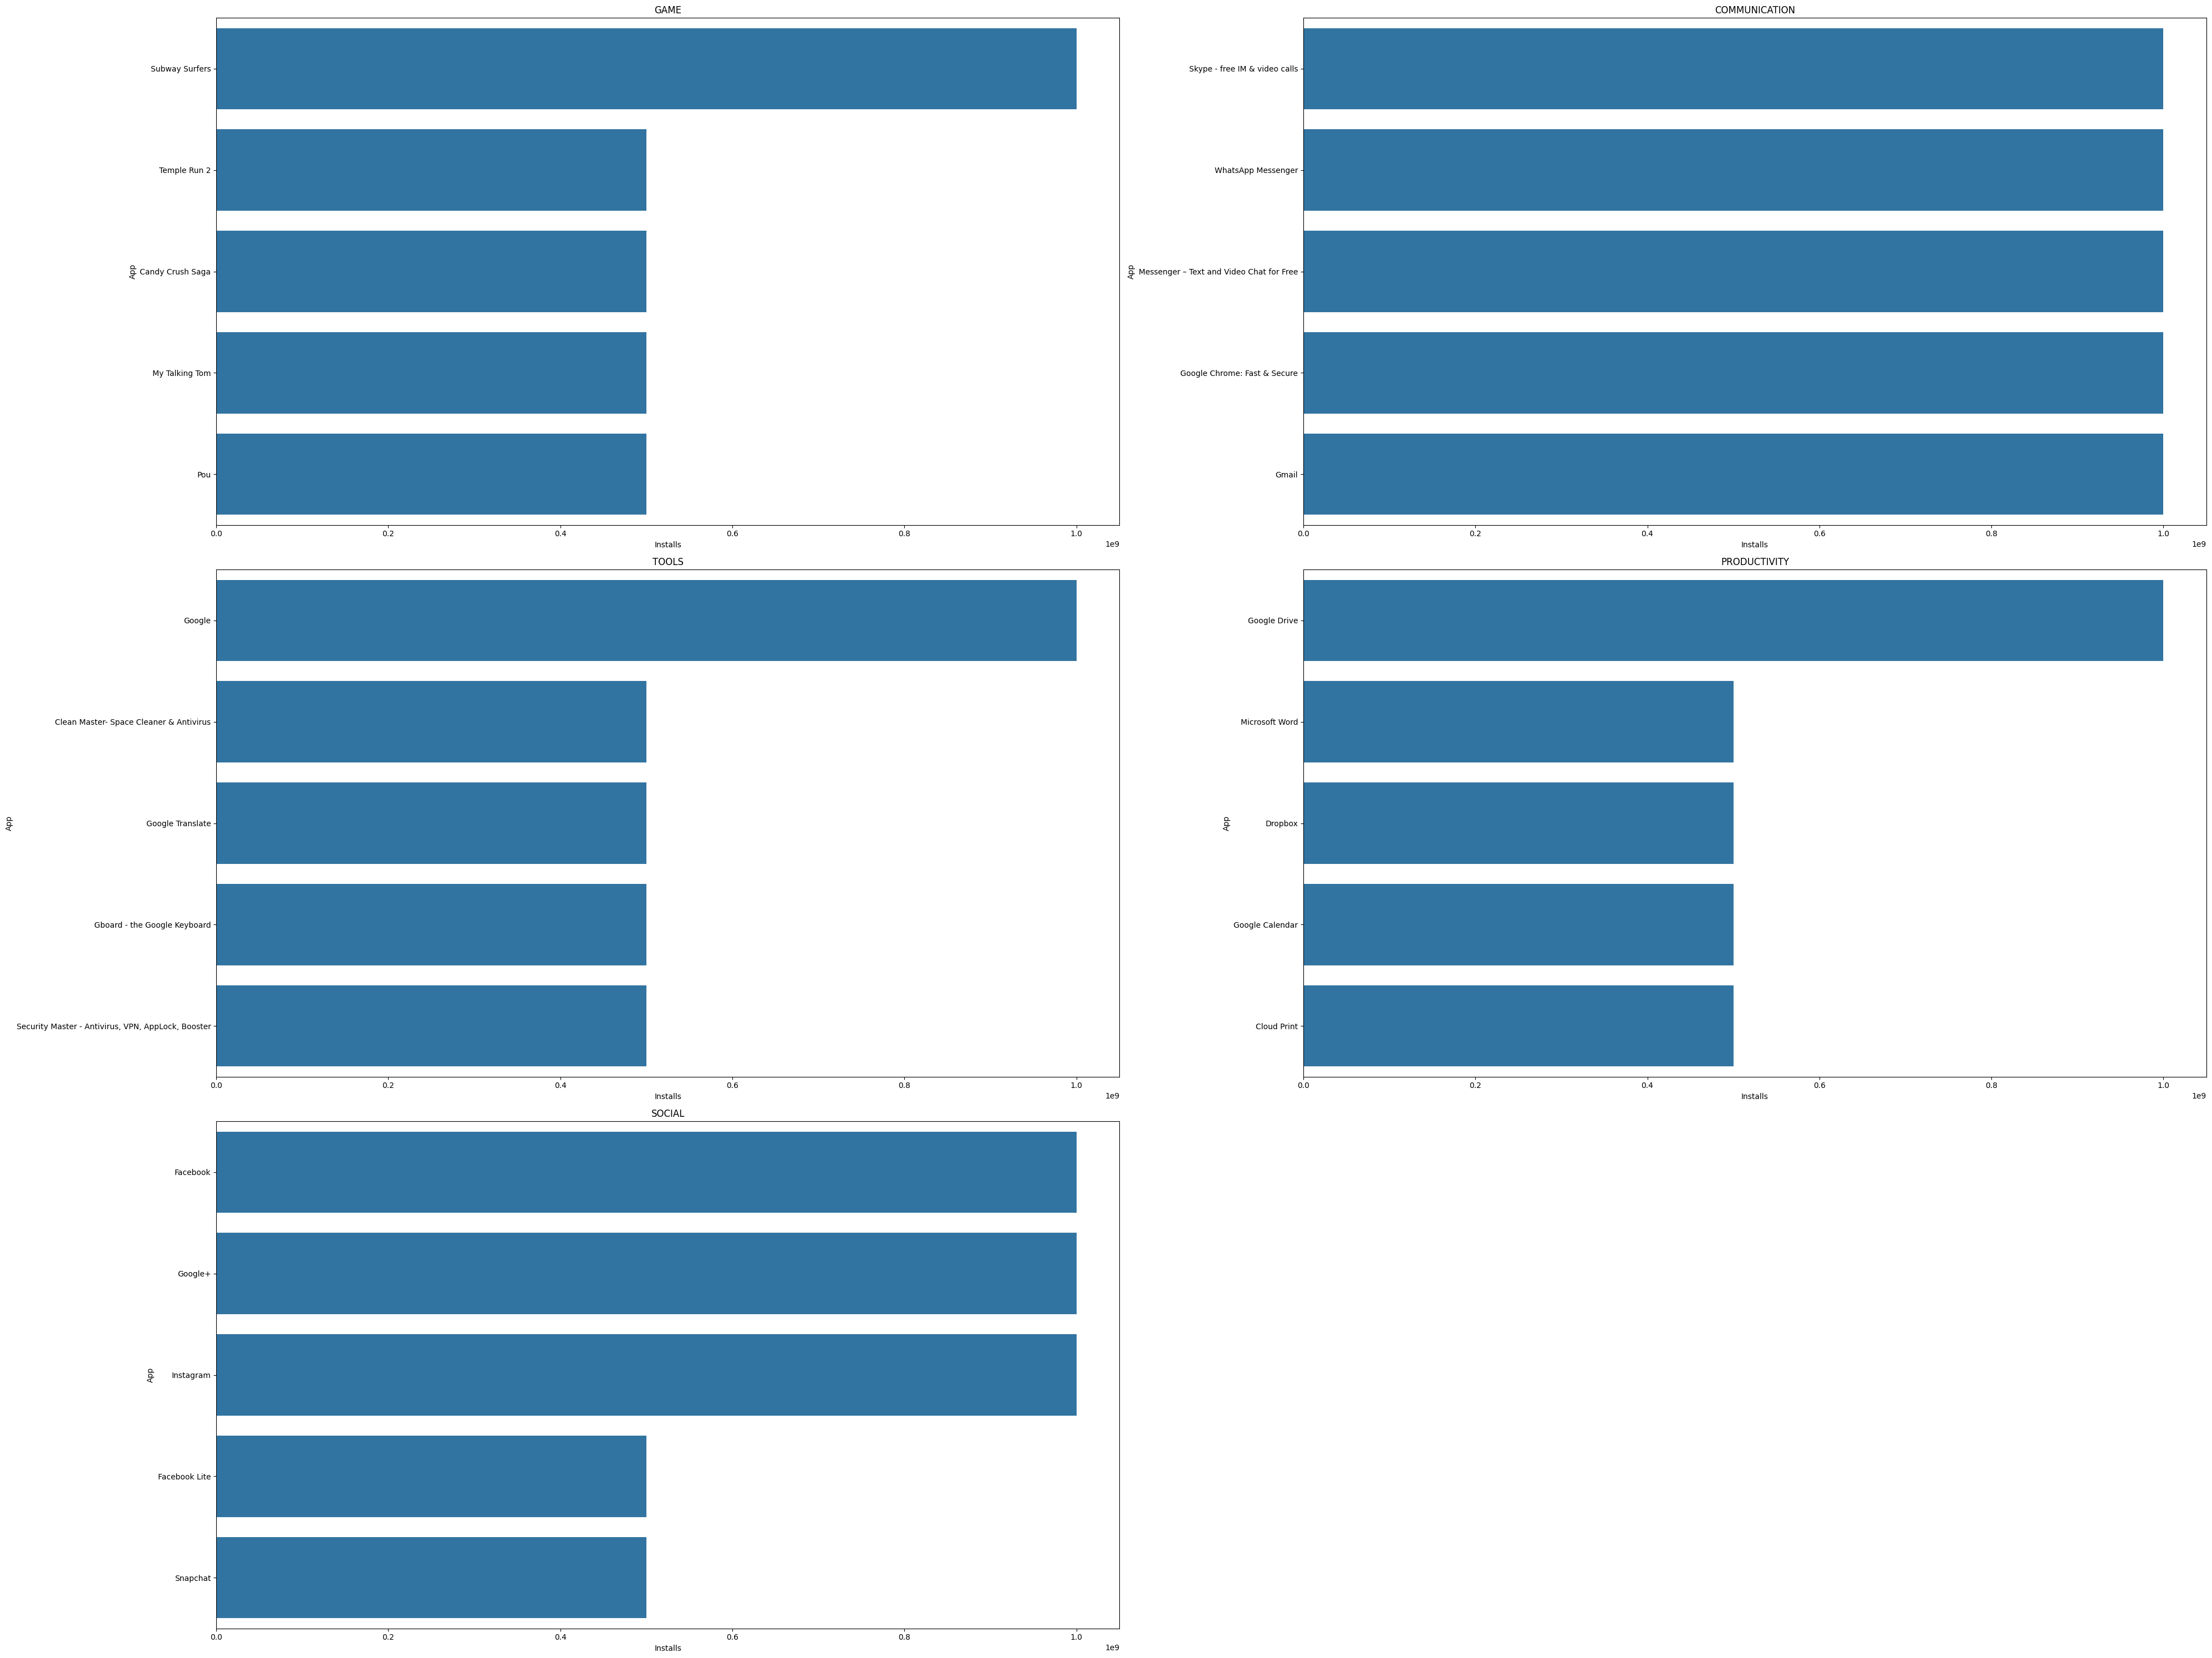

In [ ]:
apps =['GAME', 'COMMUNICATION', 'TOOLS', 'PRODUCTIVITY', 'SOCIAL']

plt.figure(figsize=(40, 30))

for i, app in enumerate(apps):
 df2 = df_app_category[df_app_category['Category'] == app].head(5)
 plt.subplot(3,2,i+1)
 sns.barplot(x='Installs', y='App', data=df2)
 plt.tight_layout()
 plt.title(app)

plt.show()

In [ ]:
# 5 rating apps based on installs

In [ ]:
rating_df = df_clean.groupby(['Category', 'Installs', 'App'])['Rating'].sum().sort_values(ascending=False).reset_index()

In [ ]:
top_rated_apps = rating_df[rating_df['Rating'] == 5.0]

In [ ]:
top_rated_apps.shape

(271, 4)

In [ ]:
top_rated_apps

,Category,Installs,App,Rating
0,FAMILY,10,DN Employee,5.0
1,FAMILY,10,Chronolink DX,5.0
2,MEDICAL,500,FHR 5-Tier 2.0,5.0
3,HEALTH_AND_FITNESS,10,CB Fit,5.0
4,MEDICAL,100,Zen Leaf,5.0
...,...,...,...,...
266,FAMILY,10,Story Time FD,5.0
267,FAMILY,50,DYPSOET,5.0
268,LIBRARIES_AND_DEMO,1000,Nur təfsiri 1-ci cild,5.0
269,LIBRARIES_AND_DEMO,1000,Eternal life,5.0


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Day             9659 non-null   int32         
 14  Month           9659 non-null   int32         
 15  Year    

In [ ]:
df_clean['Android Ver']

,Android Ver
0,4.0.3 and up
1,4.0.3 and up
2,4.0.3 and up
3,4.2 and up
4,4.4 and up
...,...
10836,4.1 and up
10837,4.1 and up
10838,2.2 and up
10839,Varies with device


In [ ]:
df_clean['Android Ver'] = df_clean['Android Ver'].str.replace(' and up','',regex=True)

In [ ]:
df_clean['Android Ver']

,Android Ver
0,4.0.3
1,4.0.3
2,4.0.3
3,4.2
4,4.4
...,...
10836,4.1
10837,4.1
10838,2.2
10839,Varies with device


In [ ]:
df_clean['Android Ver'] = df_clean['Android Ver'].str.replace('Varies with device','',regex=True).replace('W','', regex= True).replace('', np.nan)

In [ ]:
df_clean['Android Ver'].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3', nan,
       '2.2', '5.0', '6.0', '1.6', '1.5', '2.1', '7.0', '5.1', '4.3',
       '4.0.3 - 7.1.1', '2.0', '3.2', '7.1', '7.0 - 7.1.1', '8.0',
       '5.0 - 8.0', '3.1', '2.0.1', '4.1 - 7.1.1', '5.0 - 6.0', '1.0',
       '2.2 - 7.1.1', '5.0 - 7.1.1'], dtype=object)

In [ ]:
df_clean['Android Ver'].value_counts()

,count
Android Ver,
4.1,2202
4.0.3,1395
4.0,1285
4.4,829
2.3,616
5.0,512
4.2,372
2.3.3,273
2.2,239


In [ ]:
df_clean[df_clean['Android Ver'].str.contains('-') == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
350,Web Browser & Explorer,COMMUNICATION,4.0,36901,6.6,5000000,Free,0.0,Everyone,Communication,2018-07-04,11.8.6,4.0.3 - 7.1.1,4,7,2018
352,Browser 4G,COMMUNICATION,4.3,192948,6.6,10000000,Free,0.0,Everyone,Communication,2018-06-19,24.6.6,4.0.3 - 7.1.1,19,6,2018
1572,ZenUI Safeguard,LIFESTYLE,4.5,100,7.1,1000000,Free,0.0,Everyone,Lifestyle,2018-05-09,1.0.0.21_180410,7.0 - 7.1.1,9,5,2018
2841,Photo Collage - Layout Editor,PHOTOGRAPHY,4.5,285788,46000.0,10000000,Free,0.0,Everyone,Photography,2017-12-04,1.8.0.170824_9,5.0 - 8.0,4,12,2017
3474,ASUS Quick Memo,PRODUCTIVITY,4.5,23089,1.6,10000000,Free,0.0,Everyone,Productivity,2018-04-11,1.10.0.33_180403,5.0 - 8.0,11,4,2018
4151,Google Now Launcher,TOOLS,4.2,857215,7.9,100000000,Free,0.0,Everyone,Tools,2017-12-07,1.4.large,4.1 - 7.1.1,7,12,2017
7571,My Style CM 13 Theme,PERSONALIZATION,4.5,314,11000.0,10000,Free,0.0,Everyone,Personalization,2016-09-08,1.9,5.0 - 6.0,8,9,2016
9310,EF Jumper,GAME,NaN,4,5.1,100,Free,0.0,Everyone,Arcade,2017-07-13,Build 12,2.2 - 7.1.1,13,7,2017
10094,EY Catalyst Reader,BUSINESS,NaN,1,8.4,5,Free,0.0,Everyone,Business,2018-04-10,1.2.1,5.0 - 7.1.1,10,4,2018


In [ ]:
df_clean = df_clean[df_clean['Android Ver'].str.contains('-') == False]

In [ ]:
df_clean['Android Ver'].value_counts()

,count
Android Ver,
4.1,2202
4.0.3,1395
4.0,1285
4.4,829
2.3,616
5.0,512
4.2,372
2.3.3,273
2.2,239


In [ ]:
df_clean['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education', 'Education;Creativity', 'Education;Education',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity', 'Simulation',
       'Adventure', 'Board', 'Trivia', 'Role Playing',
       'Simulation;Education', 'Action;Action & Adven

In [ ]:
df_clean.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1,18,6,2017
10835,FR Forms,BUSINESS,NaN,0,9.6,10,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0,29,9,2016
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2,20,1,2017


In [ ]:
mean_genres_installs = df_clean.groupby('Genres')['Installs'].mean()/1000000

In [ ]:
mean_genres_installs

,Installs
Genres,
Action,11.255844
Action;Action & Adventure,3.910955
Adventure,4.064319
Adventure;Action & Adventure,21.230000
Adventure;Brain Games,0.100000
...,...
Video Players & Editors,7.093219
Video Players & Editors;Creativity,5.000000
Video Players & Editors;Music & Video,5.000000


In [ ]:
mean_genres_installs = mean_genres_installs.to_dict()

In [ ]:
mean_genres_installs


{'Action': 11.255844429065743,
 'Action;Action & Adventure': 3.9109545454545454,
 'Adventure': 4.064319452054795,
 'Adventure;Action & Adventure': 21.23,
 'Adventure;Brain Games': 0.1,
 'Adventure;Education': 10.0,
 'Arcade': 20.540684218390805,
 'Arcade;Action & Adventure': 2.7084616153846155,
 'Arcade;Pretend Play': 1.0,
 'Art & Design': 1.8308589285714287,
 'Art & Design;Action & Adventure': 0.1,
 'Art & Design;Creativity': 0.285,
 'Art & Design;Pretend Play': 0.5,
 'Auto & Vehicles': 0.5753873205128205,
 'Beauty': 0.303941,
 'Board': 2.859415641025641,
 'Board;Action & Adventure': 2.001666666666667,
 'Board;Brain Games': 0.5254733333333333,
 'Board;Pretend Play': 0.0001,
 'Books & Reference': 0.6850892182741116,
 'Books & Reference;Creativity': 0.0001,
 'Books & Reference;Education': 0.0055,
 'Business': 1.0347099612403101,
 'Card': 2.200636585365854,
 'Card;Action & Adventure': 5.5,
 'Casino': 2.980018918918919,
 'Casual': 17.919875741935485,
 'Casual;Action & Adventure': 4.909181

In [ ]:
df_clean['Genres Encoded'] = df_clean['Genres'].map(mean_genres_installs)

In [ ]:
df_clean['Genres Encoded']

,Genres Encoded
0,1.830859
1,0.500000
2,1.830859
3,1.830859
4,0.285000
...,...
10834,0.360664
10835,1.034710
10836,0.360664
10837,0.360664
